In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os
import sys
from pathlib import Path

p = Path(os.path.abspath(os.getcwd()))
path = Path(p)
sys.path.insert(0, str(path.parent.absolute()) + '/sub')

from magclassification import *
from imu_processing import *
from show_data import *
from plotting import *
from machine_learning import *

cwd = str(path.parent.parent.absolute())
data_cwd = cwd + '/Data/'

colors = ['r','g','b', 'c', 'm', 'y', 'k', 'indigo', 'silver', 'olive', 'springgreen', 'peru',
         'purple']
labels = os.listdir(data_cwd + '/Sample')

color_dict = {labels[i] : colors[i] for i in range(len(colors))}

print(color_dict)

{'bandgripBlack': 'r', 'bandgripBlue': 'g', 'batterypack': 'b', 'blackcowlabsGriptokBlack': 'c', 'casetifyWalletBlack': 'm', 'chargerBlack': 'y', 'gallapleWalletWhite': 'k', 'griptokBlue': 'indigo', 'iamdueChargerWhite': 'silver', 'mlinggoslotBlack': 'olive', 'supershellWalletGreen': 'springgreen', 'vicxxoChargerWhite': 'peru', 'walletBrown': 'purple'}


In [6]:
# for imu
path = data_cwd + 'Test20230303/IMU'
imu_data = IMU(path)
data = imu_data[0].data

<h3>Data load and process</h3>

In [4]:
dp1 = get_dp(data_cwd + "Train_before/Train2", is_print = False)
dp2 = get_dp(data_cwd + "Train_before/Train3", is_print = False)
dp3 = get_dp(data_cwd + "Train_before/Train1", is_print = False)
dp4 = get_dp(data_cwd + "New_accessory_train", is_print = False)

df1 = make_dataset(dp1)
df2 = make_dataset(dp2)
df3 = make_dataset(dp3)
df4 = make_dataset(dp4)
df = add_df([df1, df2, df3, df4])

X = df.drop('Label', axis = 1)
y = df['Label']

Data len :  240
Data len :  160
Data len :  240
Data len :  120


In [5]:
print(df)

          magX       magY      magZ               Label
0   -24.673983  53.653841 -7.062684       bandgripBlack
1   -23.082182  47.582028 -9.275578       bandgripBlack
2   -26.218367  52.146993 -6.943391       bandgripBlack
3   -26.765188  53.613417 -6.822436       bandgripBlack
4   -26.953883  52.890082 -6.771589       bandgripBlack
..         ...        ...       ...                 ...
755 -19.962539  48.655465  7.751283  vicxxoChargerWhite
756 -20.180944  48.415189  8.254994  vicxxoChargerWhite
757 -20.346189  50.914847  8.284846  vicxxoChargerWhite
758 -20.970413  50.868812  8.147901  vicxxoChargerWhite
759 -20.906514  51.556138  8.294609  vicxxoChargerWhite

[760 rows x 4 columns]


Model load

In [5]:
model_path = cwd+"/Models/"
svm = load_model(model_path + "SVM20230312")
rf = load_model(model_path + "RF20230312")
knn = load_model(model_path + "KNN20230312")

Test data load

In [6]:
test_path = data_cwd + 'Test'
ipath = data_cwd + 'Test20230223/iPhone12_test'

testdp = get_dp(test_path)
test_data, test_labels = make_test_dataset(testdp)
testdf = make_dataset(testdp)

Data len :  260


In [8]:
print(testdf)

          magX       magY       magZ          Label
0   -25.417711  53.313465  -7.845814  bandgripBlack
1   -26.575212  55.846928  -7.006304  bandgripBlack
2   -26.744006  52.821172  -7.487216  bandgripBlack
3   -25.579448  53.107919  -7.827913  bandgripBlack
4   -25.721392  55.132806  -7.220756  bandgripBlack
..         ...        ...        ...            ...
255 -34.095976  57.591934  29.951253    walletBrown
256 -34.158095  60.356998  30.412617    walletBrown
257 -34.908384  60.738113  30.712536    walletBrown
258 -32.058120  55.214580  27.307106    walletBrown
259 -32.540528  55.337129  27.190130    walletBrown

[260 rows x 4 columns]


Total label :  260
plot_df func
key is  chargerBlack  len is 20 color :  y
key is  vicxxoChargerWhite  len is 20 color :  peru


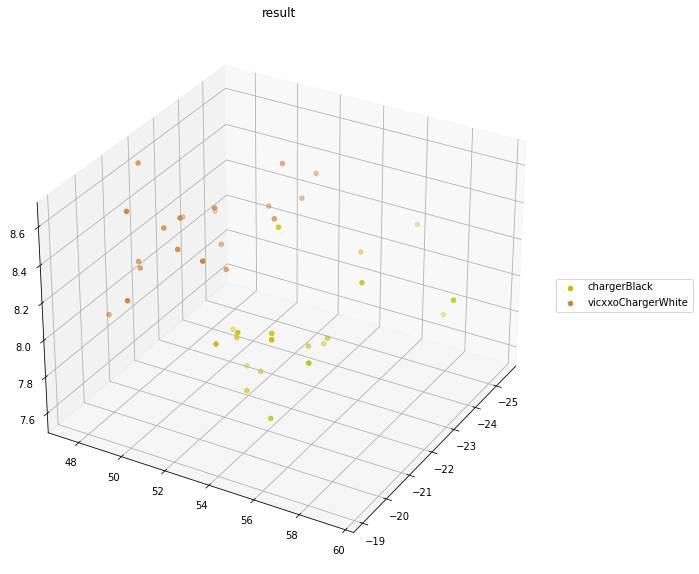

In [9]:
plot_df(testdf, color_dict, ['chargerBlack', 'vicxxoChargerWhite'])

In [5]:
get_label_diff(testdp, 'chargerBlack')
print('--------')
get_label_diff(dp1, 'griptokBlue')

[-24.58472395845479, 49.2727460371961, 4.887235755719416]
[-22.81710931421169, 52.77340560806515, 5.276841128590991]
[-23.528577016930196, 52.09354206543205, 5.003329294956451]
[-22.753311741635933, 47.060445413694346, 4.687274818064061]
[-22.058374354518165, 52.724058019666145, 5.458221156054066]
[-21.531356246318804, 53.1952024022504, 6.085353635988447]
[-23.667256231572644, 57.52372949750585, 5.406486386828881]
[-21.624455910837302, 54.99638993313757, 6.13246213878061]
[-20.428831554999995, 49.0629139400357, 6.967864619711701]
[-21.110008595600007, 48.109028543224, 6.0956243881407755]
[-23.388896846537552, 53.129172063369396, 8.699915948697502]
[-20.11797253090255, 52.477423516501474, 6.665477352453099]
[-20.88657158286034, 59.709142859367475, 9.028048107241762]
[-23.347078524966623, 59.08648181576902, 9.019491018652824]
[-22.17656933336976, 58.58162637969161, 8.951009021477903]
[-20.550726396766212, 53.301317133092766, 7.987649350723732]
[-20.372382769303886, 52.667384947452646, 8.

Show datas

In [4]:
show_datas(dp3, labels)

bandgripBlack 
Mean -26.273052884211985, 53.66444811235827, -8.015932170101737
var : 4.012543274803329, 4.205280404220123, 2.1776346101698776

bandgripBlue 
Mean -21.6126570716117, 41.97263949109518, -0.03868670968795325
var : 3.272597685817247, 3.8778473387910792, 1.1143217204402789

batterypack 
Mean -32.05069382394102, 74.48836774917729, -12.295304855807677
var : 0.9889033514936022, 2.2818402485812705, 2.056158481862763

blackcowlabsGriptokBlack 
Mean nan, nan, nan
var : nan, nan, nan

casetifyWalletBlack 
Mean nan, nan, nan
var : nan, nan, nan

chargerBlack 
Mean -19.06562842428812, 49.638690493095254, 8.348773539578298
var : 5.095106668832727, 23.739488513681557, 0.5057560021608254

gallapleWalletWhite 
Mean nan, nan, nan
var : nan, nan, nan

griptokBlue 
Mean -23.987358863036985, 43.341081674304554, 8.626279086679222
var : 16.95553133693479, 36.5962548481441, 1.9144319258692506

iamdueWalletCharger 
Mean nan, nan, nan
var : nan, nan, nan

mlinggoslotBlack 
Mean nan, nan, nan
var 

C:\Users\jaemi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jaemi\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jaemi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\jaemi\anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\jaemi\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
show_datas(dp4, labels)

bandgripBlack 
Mean nan, nan, nan
var : nan, nan, nan

bandgripBlue 
Mean nan, nan, nan
var : nan, nan, nan

batterypack 
Mean nan, nan, nan
var : nan, nan, nan

blackcowlabsGriptokBlack 
Mean nan, nan, nan
var : nan, nan, nan

casetifyWalletBlack 
Mean nan, nan, nan
var : nan, nan, nan

chargerBlack 
Mean nan, nan, nan
var : nan, nan, nan

gallapleWalletWhite 
Mean -41.0162271751236, 92.60469139577236, 33.29808028059885
var : 1.9320124667867262, 6.202591272921815, 0.5484161038672619

griptokBlue 
Mean nan, nan, nan
var : nan, nan, nan

iamdueWalletCharger 
Mean -66.32383604831898, 103.4756996499387, -16.69549854690183
var : 2.038899068039146, 1.045031108861765, 0.8682968001630261

mlinggoslotBlack 
Mean nan, nan, nan
var : nan, nan, nan

supershellWalletGreen 
Mean nan, nan, nan
var : nan, nan, nan

vicxxoChargerWhite 
Mean -21.093439450018035, 51.822562216813616, 8.204593004235537
var : 2.5977766551318817, 4.711715905620539, 0.0960435873800674

walletBrown 
Mean nan, nan, nan
var : n

In [7]:
show_datas(testdp, labels)

bandgripBlack 
Mean -25.66268153083606, 53.37749485084345, -7.589705830926849
var : 1.085659039125694, 2.983259509931865, 0.578260895215549

bandgripBlue 
Mean -21.36863048222981, 43.48468521662666, 1.6361516835978869
var : 2.6990180425972654, 3.1107374044507994, 0.5910649497958224

batterypack 
Mean -31.50634839593526, 75.54255071909881, -12.283407869021339
var : 2.1299395057049995, 2.554929037767939, 0.8848164398567013

blackcowlabsGriptokBlack 
Mean -56.68884794192062, 106.89744141294962, -110.25602039395726
var : 1.6789740552000065, 2.930474189815805, 0.844334204871269

casetifyWalletBlack 
Mean -17.85412102358621, -1.6107712456361003, -24.443372378656605
var : 1.621546906311241, 8.200990818605336, 0.7124615298733274

chargerBlack 
Mean -22.436712655977374, 54.10533792806482, 7.8951744753197435
var : 1.748576653311512, 4.468787268224095, 0.04290766279765651

gallapleWalletWhite 
Mean -37.82239697503995, 93.62747618667115, 34.35080950390454
var : 2.266786365019684, 1.04564705111263,

Total label :  260
plot_df func
key is  bandgripBlack  len is 20 color :  r
key is  bandgripBlue  len is 20 color :  g
key is  batterypack  len is 20 color :  b
key is  blackcowlabsGriptokBlack  len is 20 color :  c
key is  casetifyWalletBlack  len is 20 color :  m
key is  chargerBlack  len is 20 color :  y
key is  gallapleWalletWhite  len is 20 color :  k
key is  griptokBlue  len is 20 color :  indigo
key is  iamdueChargerWhite  len is 20 color :  silver
key is  mlinggoslotBlack  len is 20 color :  olive
key is  supershellWalletGreen  len is 20 color :  springgreen
key is  vicxxoChargerWhite  len is 20 color :  peru
key is  walletBrown  len is 20 color :  purple


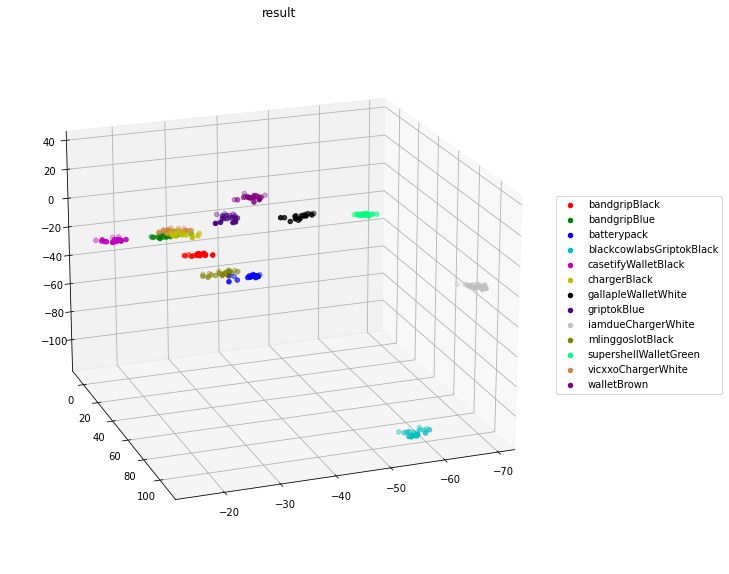

In [8]:
testdf = make_dataset(testdp)
plot_df(testdf, color_dict, labels, height = 20, angle = 70)

In [14]:
show_data(testdp, labels)

bandgripBlack 
Mean -25.36538278259656, 52.62782545288593, -8.821640994095098
var : 3.120606438554181, 2.806988228280126, 1.1114493576597628

bandgripBlue 
Mean -21.332428878247708, 42.12507088556623, 1.670229625046245
var : 0.8302986845928988, 2.9176345517665627, 1.4090969132467022

batterypack 
Mean -28.638276000954193, 76.46996935460939, -16.4939639542391
var : 1.0537011107601513, 8.440233348828771, 4.000338887535747

casetifyWalletBlack 
Mean -17.758569175461837, -18.77494625040527, -27.07000763771122
var : 3.0873110099773164, 19.349656820423426, 1.282617570621508

chargerBlack 
Mean -21.796901863873536, 52.819276432792606, 6.853962010655818
var : 1.9015063357779387, 13.052213642765489, 2.112460013136279

griptokBlue 
Mean -30.27150575866086, 38.02129211829221, 9.175777981004478
var : 4.200246663231686, 17.26546056598749, 0.7100701248854595

mlinggoslotBlack 
Mean -28.915046918183805, 56.011520559143875, -20.644416054267303
var : 5.623476480843051, 11.41657668814268, 1.098466591467

Show label's value

In [15]:
show_values(test_data, test_labels, 'walletBrown')

-47.40938586250727     83.25633736008695     31.911833879769233
-48.38321927416668     83.57569044408334     33.347614133779004
-46.12013892275426     81.36186694795286     32.68915274894782
-44.7079210279331     78.98124553172698     33.176254211263156
-46.25675872868399     79.29412001678685     32.26538651073571
-44.96434085052019     74.33692817349208     30.581243024476166
-45.495161236357944     77.57023523753003     31.29483723956712
-44.55513318285931     75.71752554851037     32.35239883379393
-44.922516929426024     77.21503659700257     31.47099487736714
-43.016028951781664     77.61693218109163     33.94405088767705
-40.70154559464211     78.87547790169826     30.286325344231866
-42.50537070000427     69.13442953540597     29.68906641233528
-43.37023034423776     75.39591057069927     31.48342634695647
-38.93892030912863     69.77756427727775     28.637501721117616
-37.56980306316745     67.27891652136962     30.158378790079873
-38.6351139322102     73.85499250504854     31

<h3>Model training</h3>

In [4]:
knn = get_knn()
rf = get_rf()
svm = get_svm()

svm.fit(X, y)
rf.fit(X, y)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=20)

In [6]:
path = cwd + "/Models/"
date = '20230312'
print(path)
save_model(knn, path + 'KNN' + date)
save_model(rf, path + 'RF' + date)
save_model(svm, path + 'SVM' + date)

C:/Users/jaemi/lab_magacc/Models/
C:/Users/jaemi/lab_magacc/Models/KNN20230312
C:/Users/jaemi/lab_magacc/Models/RF20230312
C:/Users/jaemi/lab_magacc/Models/SVM20230312


In [7]:
print('SVM accuracy : {:.2f}'.format(svm.score(test_data, test_labels)))
print('RF accuracy : {:.2f}'.format(rf.score(test_data, test_labels)))
print('KNN accuracy : {:.2f}'.format(knn.score(test_data, test_labels)))

SVM accuracy : 0.92
RF accuracy : 0.91
KNN accuracy : 0.92


In [7]:
print('rf')
find_model_error(rf, test_data, test_labels)
print('\n\nknn')
find_model_error(knn, test_data, test_labels)
print('\n\nsvm')
find_model_error(svm, test_data, test_labels)

rf
test label is chargerBlack, but predicted vicxxoChargerWhite with values (0   -20.622854
Name: magX, dtype: float64, 0    52.093933
Name: magY, dtype: float64, 0    7.945232
Name: magZ, dtype: float64)
test label is chargerBlack, but predicted vicxxoChargerWhite with values (0   -21.573227
Name: magX, dtype: float64, 0    53.572201
Name: magY, dtype: float64, 0    7.945035
Name: magZ, dtype: float64)
test label is chargerBlack, but predicted vicxxoChargerWhite with values (0   -23.132676
Name: magX, dtype: float64, 0    54.275503
Name: magY, dtype: float64, 0    7.73005
Name: magZ, dtype: float64)
test label is chargerBlack, but predicted vicxxoChargerWhite with values (0   -21.326196
Name: magX, dtype: float64, 0    55.511461
Name: magY, dtype: float64, 0    7.881879
Name: magZ, dtype: float64)
test label is chargerBlack, but predicted vicxxoChargerWhite with values (0   -20.908339
Name: magX, dtype: float64, 0    54.301346
Name: magY, dtype: float64, 0    8.014288
Name: magZ, dtyp

test label is vicxxoChargerWhite, but predicted chargerBlack with values (0   -20.891975
Name: magX, dtype: float64, 0    48.330147
Name: magY, dtype: float64, 0    8.195297
Name: magZ, dtype: float64)
test label is vicxxoChargerWhite, but predicted chargerBlack with values (0   -20.919221
Name: magX, dtype: float64, 0    48.22222
Name: magY, dtype: float64, 0    8.224239
Name: magZ, dtype: float64)
test label is vicxxoChargerWhite, but predicted chargerBlack with values (0   -21.646176
Name: magX, dtype: float64, 0    47.43788
Name: magY, dtype: float64, 0    8.647405
Name: magZ, dtype: float64)
test label is vicxxoChargerWhite, but predicted chargerBlack with values (0   -20.044902
Name: magX, dtype: float64, 0    48.82501
Name: magY, dtype: float64, 0    8.604184
Name: magZ, dtype: float64)
test label is vicxxoChargerWhite, but predicted chargerBlack with values (0   -19.093492
Name: magX, dtype: float64, 0    49.929974
Name: magY, dtype: float64, 0    8.277297
Name: magZ, dtype: fl

Confusion matrix

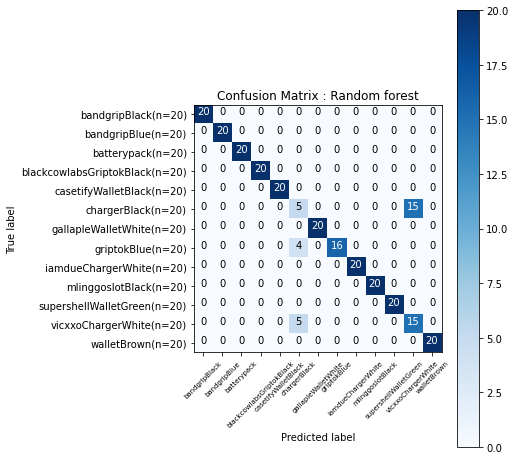

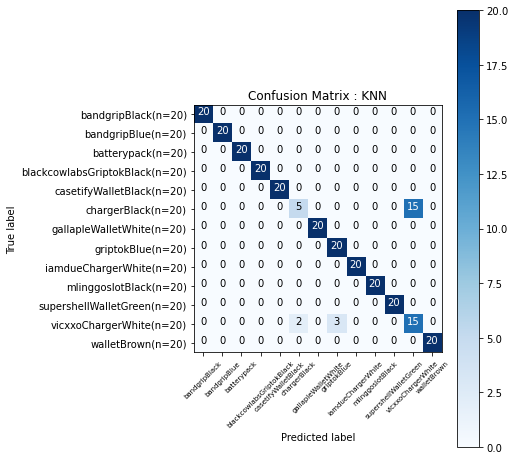

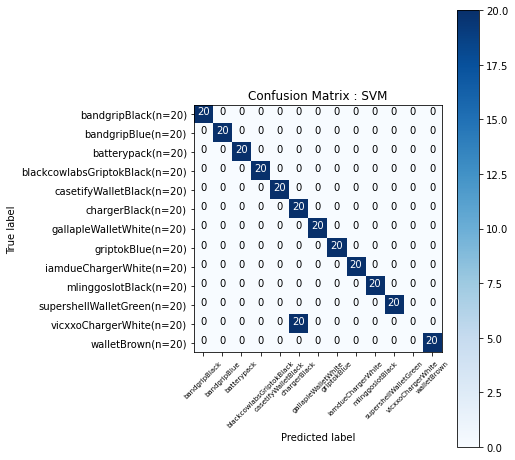

In [8]:
r = rf.predict(test_data)
k = knn.predict(test_data)
s = svm.predict(test_data)


crf = confusion_matrix(test_labels, r)
ckn = confusion_matrix(test_labels, k)
cs = confusion_matrix(test_labels, s)

plot_confusion_matrix(crf, labels= labels, title = "Confusion Matrix : Random forest")
plot_confusion_matrix(ckn, labels= labels, title = "Confusion Matrix : KNN")
plot_confusion_matrix(cs, labels= labels, title = "Confusion Matrix : SVM")

Models

In [10]:
print(type(cs))

<class 'numpy.ndarray'>


In [63]:
models = {'knn' : knn, 'svm' : svm, 'rf' : rf}

In [45]:
# For dynamic environment
epath = data_cwd + 'Test20230223/Car'
cpath = data_cwd + 'Test20230223/Cradle/dynamic'
tpath = data_cwd + 'Test'

fm = IMU(cpath)

for i, f in enumerate(fm):
    print('{} th {}'.format(i, f.path))

0 th C:/Users/jaemi/lab_magacc/Data/Test20230223/Cradle/dynamic/ojujuCradle/Imu 2023-02-23 12-05-26
1 th C:/Users/jaemi/lab_magacc/Data/Test20230223/Cradle/dynamic/ojujuCradle/Imu 2023-02-23 12-05-54


C:/Users/jaemi/lab_magacc/Data/Test20230223/Cradle/dynamic/ojujuCradle/Imu 2023-02-23 12-05-54
accX


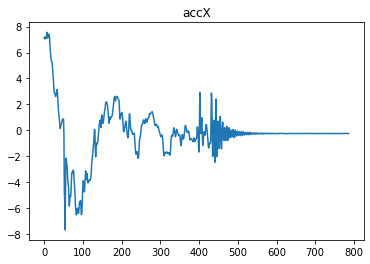

accY


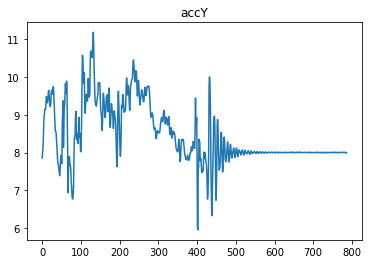

accZ


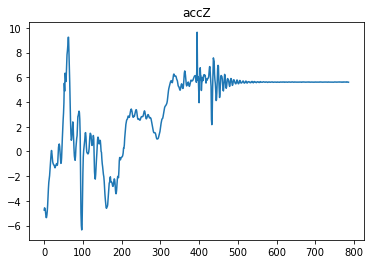

gyroX


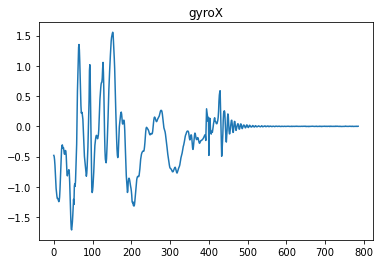

gyroY


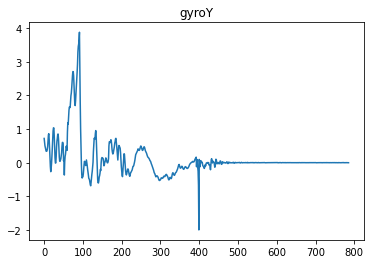

gyroZ


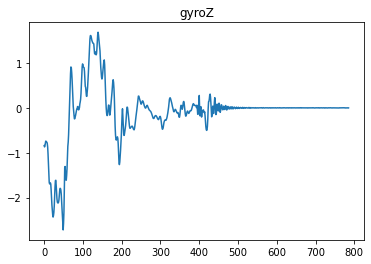

magX


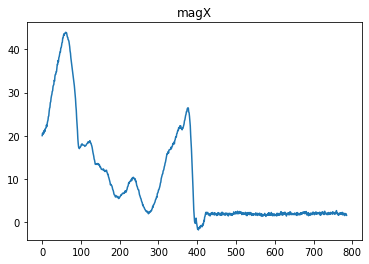

magY


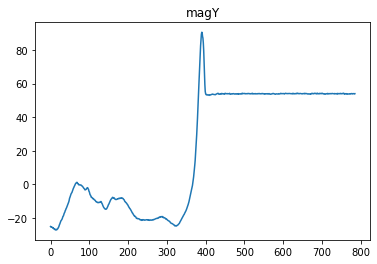

magZ


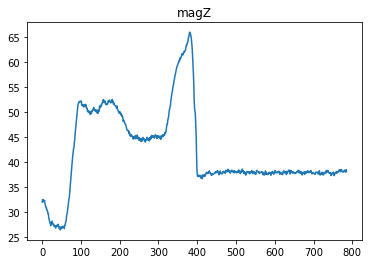

In [48]:
idx = 1
feature = fm[idx]
print(feature.path)

plot_graphs(feature, 'acc')
plot_graphs(feature, 'gyro')
plot_graphs(feature, 'mag')

In [30]:
# for angle(chargerBlack)
acc = 'iamdueChargerWhite'
angle_train_paths = data_cwd + 'Test20230223/angle_train_{}/'.format(acc)
angle_test_paths =  data_cwd + 'Test20230223/angle_test_{}/'.format(acc)

angle_dir = [angle_train_paths + '{}'.format(90*i) for i in range(1, 4)]
angle_df_lst = []

for path in angle_dir:
    adp = get_dp(path)
    adf = make_dataset(adp)
    angle_df_lst.append(adf)

angle_df = add_df(angle_df_lst)

Data len :  10
Data len :  10
Data len :  10


In [17]:
total_df = add_df([angle_df, df])
print(total_df)

knn = get_knn()
rf = get_rf()
svm = get_svm()

models = {'knn' : knn, 'svm' : svm, 'rf' : rf}

models = train_models(models, total_df)

test_paths = [angle_test_paths + '{}'.format(90*i) for i in range(1, 4)]

print(test_paths)
df_lst = []
for path in test_paths:
    tdf = make_dataset(get_dp(path))
    df_lst.append(tdf)
#     dp = get_dp(path)
#     test_data, test_labels = make_test_dataset(dp)
#     print(path)
#     test_models(models, test_data, test_labels)

          magX       magY       magZ               Label
0   -21.976936  68.191576  10.991452        chargerBlack
1   -18.447135  64.560665  10.463603        chargerBlack
2   -19.038123  65.105872  11.206444        chargerBlack
3   -22.173381  63.012047  11.060570        chargerBlack
4   -21.116213  67.334999  11.186900        chargerBlack
..         ...        ...        ...                 ...
785 -19.962539  48.655465   7.751283  vicxxoChargerWhite
786 -20.180944  48.415189   8.254994  vicxxoChargerWhite
787 -20.346189  50.914847   8.284846  vicxxoChargerWhite
788 -20.970413  50.868812   8.147901  vicxxoChargerWhite
789 -20.906514  51.556138   8.294609  vicxxoChargerWhite

[790 rows x 4 columns]
['C:/Users/jaemi/lab_magacc/Data/Test20230223/angle_test_chargerBlack/90', 'C:/Users/jaemi/lab_magacc/Data/Test20230223/angle_test_chargerBlack/180', 'C:/Users/jaemi/lab_magacc/Data/Test20230223/angle_test_chargerBlack/270']
Data len :  10
Data len :  10
Data len :  10


0th accuary
knn : 1.000
svm : 1.000
rf : 1.000

1th accuary
knn : 1.000
svm : 1.000
rf : 1.000

2th accuary
knn : 0.700
svm : 0.000
rf : 0.900



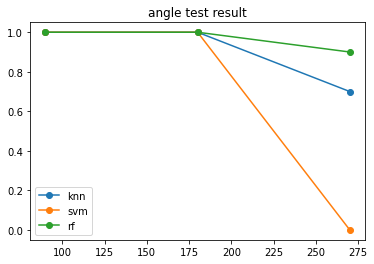

In [13]:
scores = ml_score(models, df_lst)
x = [90*i for i in range(1, 4)]
plot_score(x, scores, title = "angle test result")

In [40]:
for path in test_paths:
    test_data, test_labels = make_test_dataset(get_dp(path))
    print(path)
    print('rf')
    find_model_error(rf, test_data, test_labels)
    print('\n\nknn')
    find_model_error(knn, test_data, test_labels)
    print('\n\nsvm')
    find_model_error(svm, test_data, test_labels)

Data len :  10
C:/Users/jaemi/lab_magacc/Data/Test20230223/angle_test_iamdueChargerBlack/90
rf


knn


svm
Data len :  10
C:/Users/jaemi/lab_magacc/Data/Test20230223/angle_test_iamdueChargerBlack/180
rf


knn


svm
Data len :  10
C:/Users/jaemi/lab_magacc/Data/Test20230223/angle_test_iamdueChargerBlack/270
rf


knn
test label is iamdueChargerWhite, but predicted batterypack with values (0   -54.019678
Name: magX, dtype: float64, 0    75.106834
Name: magY, dtype: float64, 0   -14.933495
Name: magZ, dtype: float64)
test label is iamdueChargerWhite, but predicted batterypack with values (0   -53.271876
Name: magX, dtype: float64, 0    77.461747
Name: magY, dtype: float64, 0   -14.911508
Name: magZ, dtype: float64)
test label is iamdueChargerWhite, but predicted batterypack with values (0   -53.448993
Name: magX, dtype: float64, 0    75.222646
Name: magY, dtype: float64, 0   -14.57083
Name: magZ, dtype: float64)
test label is iamdueChargerWhite, but predicted batterypack with values (0   -

iamdueChargerWhite color is gold
iamdueChargerWhite color is pink
iamdueChargerWhite color is slateblue
Total label :  760


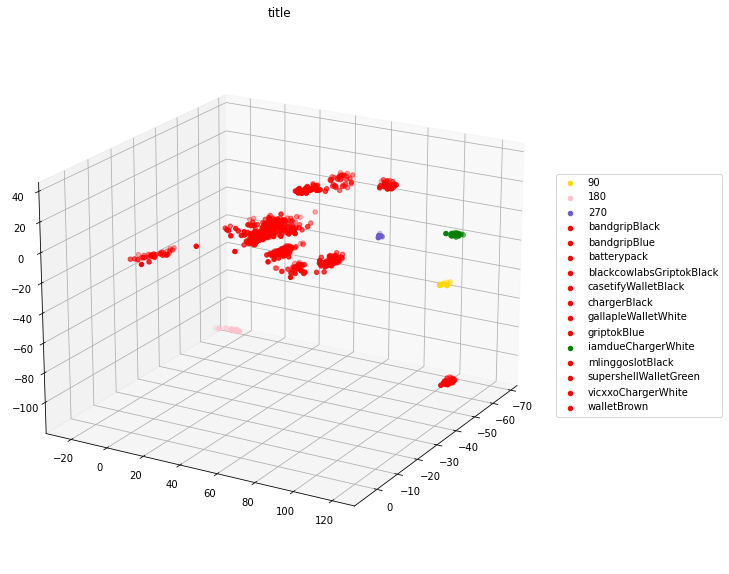

In [32]:
dics = []

height = 20
angle = 30

for tmp in angle_df_lst:
    d = df_to_dic(tmp)
    dics.append(d)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

angle_colors = ['gold', 'pink', 'slateblue']

for idx, dic in enumerate(dics):
    for label, value in dic.items():
        print('{} color is {}'.format(label, angle_colors[idx]))
        ax.scatter(value[0], value[1], value[2], color = angle_colors[idx], label = (idx+1)*90)

dic = df_to_data(df, labels)

tmp_dict = {}

for key, value in color_dict.items():
    tmp_dict[key] = 'g' if key == acc else 'r'

for key, data in dic.items():
    ax.scatter(data[0], data[1], data[2], color = tmp_dict[key], label = key)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.view_init(height, angle)
plt.title("title")
plt.show()

chargerBlack color is g
chargerBlack color is b
chargerBlack color is c
bandgripBlack color is r
bandgripBlue color is r
batterypack color is r
chargerBlack color is r
griptokBlue color is r
walletBrown color is r
blackcowlabsGriptokBlack color is r
casetifyWalletBlack color is r
mlinggoslotBlack color is r
supershellWalletGreen color is r
gallapleWalletWhite color is r
iamdueChargerWhite color is r
vicxxoChargerWhite color is r


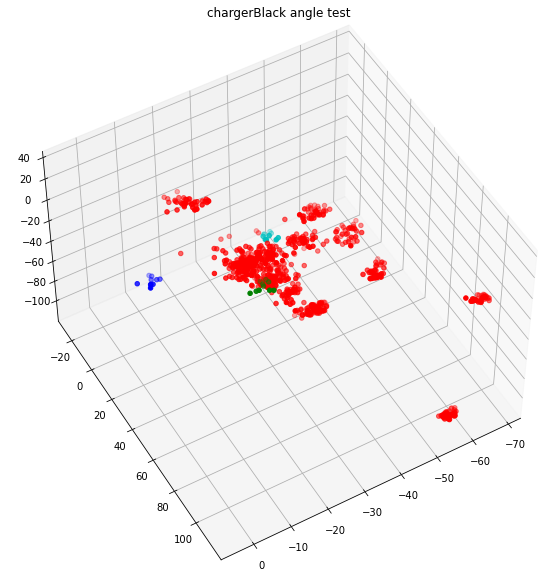

In [14]:
dics = []

for tmp in angle_df_lst:
    d = df_to_dic(tmp)
    dics.append(d)

dic1 = df_to_dic(df)
dics.append(dic1)

color1 = ['r' for _ in range(len(labels))]
color2 = ['g']
color3 = ['b']
color4 = ['c']
plot_dics(dics, [color2, color3, color4, color1], title = 'chargerBlack angle test',
         angle = 60, height = 50)

In [ ]:
angle_plot = {l : [] for l in labels}

for label in labels:
  print('{}-ing'.format(label))
  for place, dp in angle_data.items():
    pdata = prepare_data(dp, label)
    angle_plot[label].append(pdata)

angle_df = []
for p, dp in angle_data.items():
  angle_df.append(make_dataset(dp))

In [ ]:
for label in labels:
  trained_pd = prepare_data(datas, label)
  plot_two([trained_pd], angle_plot[label], title = label)
  plot_data(angle_plot[label], colors = colors)

In [ ]:
angle_scores = ml_score(models, angle_df)

print(angle_scores)
plot_score(angle, angle_scores, title = "Angle score")